# Exercícios 04

- Questões do CEO:

1. Crie uma nova coluna chamada:“dormitory_type”:
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” forigual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

2. Faça um gráfico de barras que represente a soma dos preços pelonúmero de quartos.

3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

7. Crie um Dashboard com os gráficos das questões 02, 03, 04( Dashboard: 1 Linha e 2 colunas )

8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

9. Crie um Dashboardcom os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

# 0.1 - IMPORTANDO AS BIBLIOTECAS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 0.2 - IMPORTANDO OS DADOS

In [2]:
df4= pd.read_csv('./kc_house_data.csv')

In [3]:
df4.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4038,3277801450,20150415T000000,390000.0,4,1.0,1140,6250,1.5,0,0,...,6,1140,0,1958,0,98126,47.5433,-122.375,1140,1370


# 1. Crie uma nova coluna chamada:“dormitory_type”:

Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
Se o valor da coluna “bedrooms” forigual a 2 => ‘apartament’
Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


In [4]:
#criar uma nova coluna 
# fazer uma condição para atribuir os perfis

df4['dormitory_type'] = df4['bedrooms'].apply(lambda x: 'studio' if x==1 else 'apartament' if x==2 else 
                                              'house' if x>2 else 'NA')
                                            

# 2. Faça um gráfico de barras que represente a soma dos preços pelo números de quartos.

In [5]:
aux1 = df4[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

In [6]:
aux1.head()

,bedrooms,price
0,0,5.323550e+06
1,1,6.321093e+07
2,2,1.107789e+09
3,3,4.580264e+09
4,4,4.372957e+09


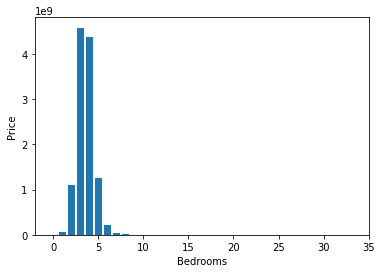

In [7]:
plt.bar(aux1['bedrooms'],aux1['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price');

# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [8]:
# transformar as datas (em datetime)
# selecionar o coluna de preços e ano de construção



aux2= df4[['price','yr_built']].groupby('yr_built').mean().reset_index()

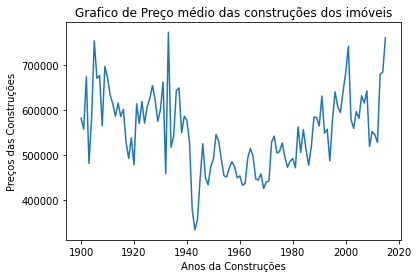

In [9]:
plt.plot(aux2['yr_built'],aux2['price'])
plt.title('Grafico de Preço médio das construções dos imóveis')
plt.xlabel('Anos da Construções')
plt.ylabel('Preços das Construções');

# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [10]:
aux3= df4[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()

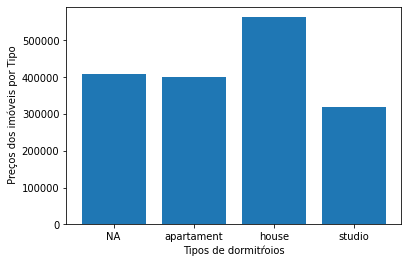

In [16]:
plt.bar(aux3['dormitory_type'],aux3['price'])
plt.xlabel('Tipos de dormitŕoios')
plt.ylabel(' Preços dos imóveis por Tipo');

# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [53]:
# coluna da reforma e de preços
# fazer um filtro para selecionar as datas
# não esquecr de transformar em data

filtro= df4[df4['yr_renovated']>=1930]

In [57]:
aux4 = filtro[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()

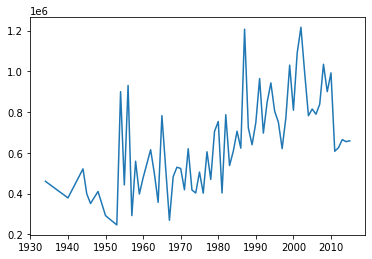

In [59]:
plt.plot(aux4['yr_renovated'],aux4['price']);

# 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [66]:
aux5= df4[['price','dormitory_type','yr_built']].groupby(['dormitory_type','yr_built']).mean().reset_index()

<AxesSubplot:>

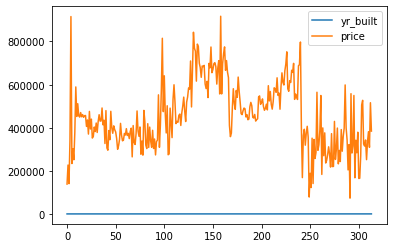

In [77]:
aux5.plot()

# 7. Crie um Dashboard com os gráficos das questões 02, 03, 04( Dashboard: 1 Linha e 2 colunas )